In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [ ]:
data_csv = pd.DataFrame({
    'eid': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
            101, 112, 113, 114, 115, 116, 117, 118, 119, 120],
    'salary': [50000, 60000, 55000, 70000, None, 65000, 80000, 72000, 68000, 63000,
               50000, 59000, 61000, None, 64000, 66000, 71000, 68000, 69000, 72000],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male',
               'Female', 'Male', 'Male', 'Female', 'Female',
               'Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male'],
    'age': [28, 32, 29, 35, 30, 33, 38, 36, 31, 34,
            28, 30, 32, 35, 31, None, 37, 33, 34, 36],
    'car_purchased': [15000, 18000, 16000, 22000, 21000, 19000, 25000, 23000, None, 20000,
                      15000, 17500, 18500, 21000, 19500, 20000, 24000, 23000, 22000, 25000]
})

In [ ]:
# 3. Display head, tail, describe, check nulls and duplicates
print(data_csv.head())
print(data_csv.tail())
print(data_csv.describe())
print("Null Values:\n", data_csv.isnull().sum())
data_csv = data_csv.dropna()
data_csv = data_csv.drop_duplicates()


   eid   salary  gender   age  car_purchased
0  101  50000.0    Male  28.0        15000.0
1  102  60000.0  Female  32.0        18000.0
2  103  55000.0    Male  29.0        16000.0
3  104  70000.0  Female  35.0        22000.0
4  105      NaN    Male  30.0        21000.0
    eid   salary  gender   age  car_purchased
15  116  66000.0    Male   NaN        20000.0
16  117  71000.0  Female  37.0        24000.0
17  118  68000.0    Male  33.0        23000.0
18  119  69000.0  Female  34.0        22000.0
19  120  72000.0    Male  36.0        25000.0
              eid        salary        age  car_purchased
count   20.000000     18.000000  19.000000      19.000000
mean   110.000000  64611.111111  32.736842   20236.842105
std      6.282809   7852.604580   2.997075    3097.348423
min    101.000000  50000.000000  28.000000   15000.000000
25%    104.750000  60250.000000  30.500000   18250.000000
50%    109.500000  65500.000000  33.000000   20000.000000
75%    115.250000  69750.000000  35.000000   225

In [ ]:
# 4. Handle EDA and Label Encoding
le = LabelEncoder()
data_csv['gender'] = le.fit_transform(data_csv['gender'])

In [ ]:
# 5. Target count
print("Target counts:\n", Counter(data_csv['car_purchased']))

Target counts:
 Counter({22000.0: 2, 25000.0: 2, 23000.0: 2, 15000.0: 1, 18000.0: 1, 16000.0: 1, 19000.0: 1, 20000.0: 1, 17500.0: 1, 18500.0: 1, 24000.0: 1})


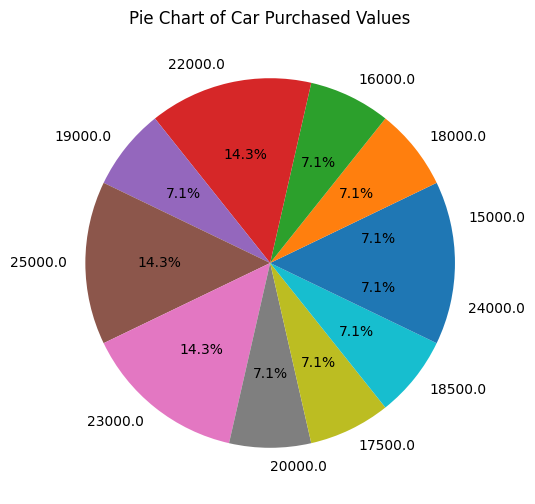

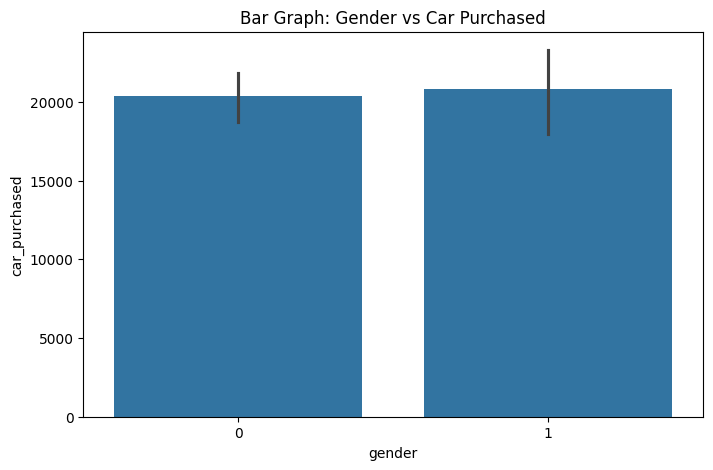

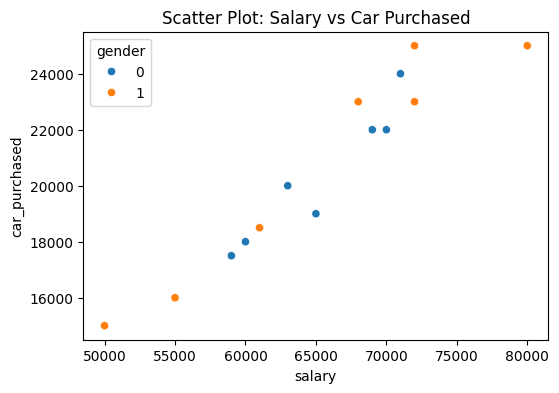

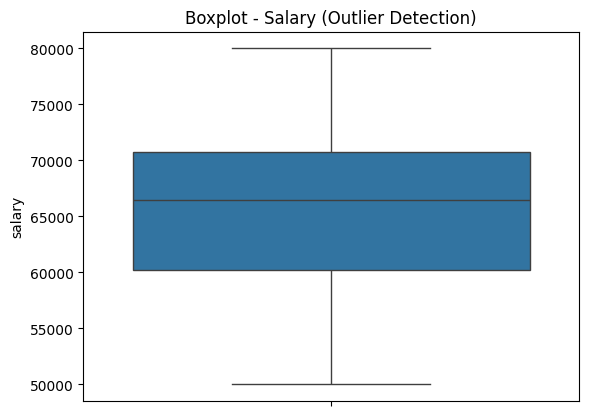

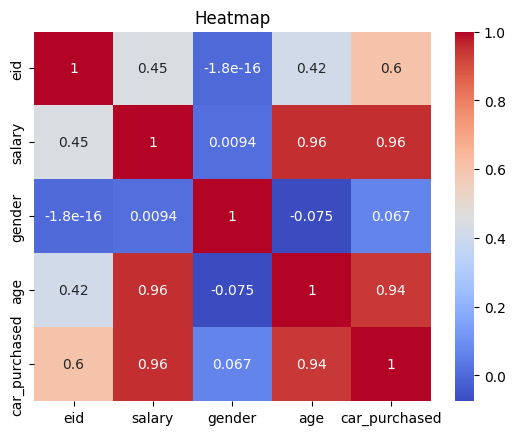

In [ ]:
# 6. Visualization
plt.figure(figsize=(6,6))
plt.pie(Counter(data_csv['car_purchased']).values(), labels=Counter(data_csv['car_purchased']).keys(), autopct='%1.1f%%')
plt.title("Pie Chart of Car Purchased Values")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='gender', y='car_purchased', data=data_csv)
plt.title("Bar Graph: Gender vs Car Purchased")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='salary', y='car_purchased', hue='gender', data=data_csv)
plt.title("Scatter Plot: Salary vs Car Purchased")
plt.show()



sns.boxplot(data=data_csv['salary'])
plt.title("Boxplot - Salary (Outlier Detection)")
plt.show()

# 8. Heatmap
sns.heatmap(data_csv.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap")
plt.show()

In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(data_csv['salary']))
outliers_z = data_csv[z_scores > 2]  # use 2 or 3 depending on tolerance
print("Outliers (Z-score method):\n", outliers_z)


Outliers (Z-score method):
    eid   salary  gender   age  car_purchased
0  101  50000.0       1  28.0        15000.0


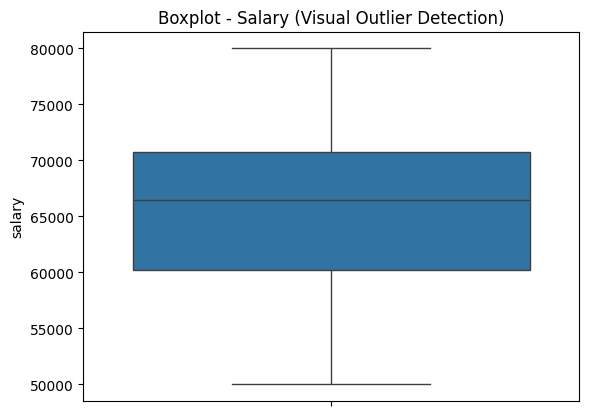

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=data_csv['salary'])
plt.title("Boxplot - Salary (Visual Outlier Detection)")
plt.show()


In [ ]:
# 9. Split and Train Model (Simple: salary → car_purchased)
X = data_csv[['salary']]
y = data_csv['car_purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# 10. Predict and Evaluate
y_pred = model_simple.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# 11. Plot Best Fit Line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title("Best Fit Line (Simple Linear Regression)")
plt.xlabel("Salary")
plt.ylabel("Car Purchased")
plt.show()

In [ ]:
### ------ Naive Bayes Classifier ------
print("\n--- NAIVE BAYES ---")
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

cv_nb = cross_val_score(nb, X, y, cv=5)
print("Naive Bayes CV Scores:", cv_nb)
print("Mean CV Accuracy:", np.mean(cv_nb))